### Linear Regression with Statsmodels

##### Imports

In [1]:
# provides numerous math functions related to linear algebra and more
import numpy as np
# Provides numerous tools for manipulating tabular data and more
import pandas as pd
# Provides numerous tools related to statistical data analysis
import statsmodels.api as sm
# used to create static and interactive graphical data points
import matplotlib.pyplot as plt
# Extends the capabilities of matplotlib
import seaborn as sns

##### Exploring Data

In [4]:
# You can use R datasets
# https://vincentarebundock.github.io/Rdatasets/datasets.html
beauty = sm.datasets.get_rdataset("TeachingRatings", "AER")
print(beauty.__doc__)

.. container::

   .. container::

      =============== ===============
      TeachingRatings R Documentation
      =============== ===============

      .. rubric:: Impact of Beauty on Instructor's Teaching Ratings
         :name: impact-of-beauty-on-instructors-teaching-ratings

      .. rubric:: Description
         :name: description

      Data on course evaluations, course characteristics, and professor
      characteristics for 463 courses for the academic years 2000–2002
      at the University of Texas at Austin.

      .. rubric:: Usage
         :name: usage

      ::

         data("TeachingRatings")

      .. rubric:: Format
         :name: format

      A data frame containing 463 observations on 13 variables.

      minority
         factor. Does the instructor belong to a minority
         (non-Caucasian)?

      age
         the professor's age.

      gender
         factor indicating instructor's gender.

      credits
         factor. Is the course a single-credit 

In [5]:
beauty.data.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 10 May 2024   Prob (F-statistic):           4.25e-05
Time:                        11:28:36   Log-Likelihood:                -538.11
No. Observations:                 463   AIC:                             1080.
Df Residuals:                     461   BIC:                             1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0743      0.262     -4.094      0.000      -1.590      -0.559
eval           0.2687      0.065      4.133      0.000       0.141       0.396
==============================================================================
Omnibus:                       25.836   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.678
Skew:                           0.512   Prob(JB):                     4.38e-06
Kurtosis:                       2.518   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

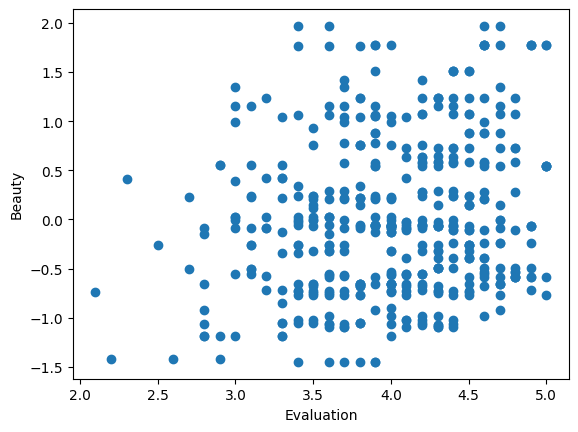

In [6]:
y = beauty.data['beauty']
x1 = beauty.data['eval']
plt.scatter(x1, y)
plt.xlabel('Evaluation')
plt.ylabel('Beauty')

x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

##### Plot Regression Line

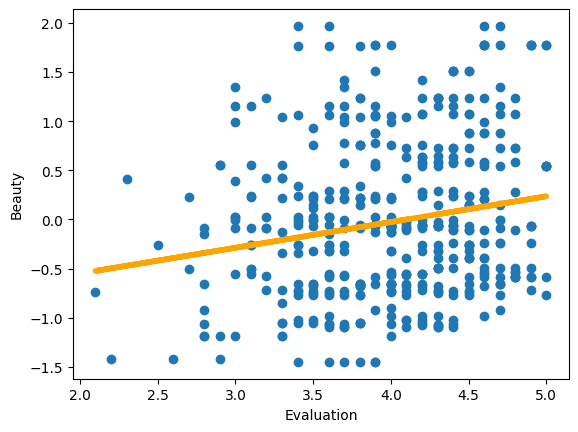

In [8]:
plt.scatter(x1, y)
plt.xlabel('Evaluation')
plt.ylabel('Beauty')
yhat = 0.262 * x1 - 1.0743
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression')
plt.show()

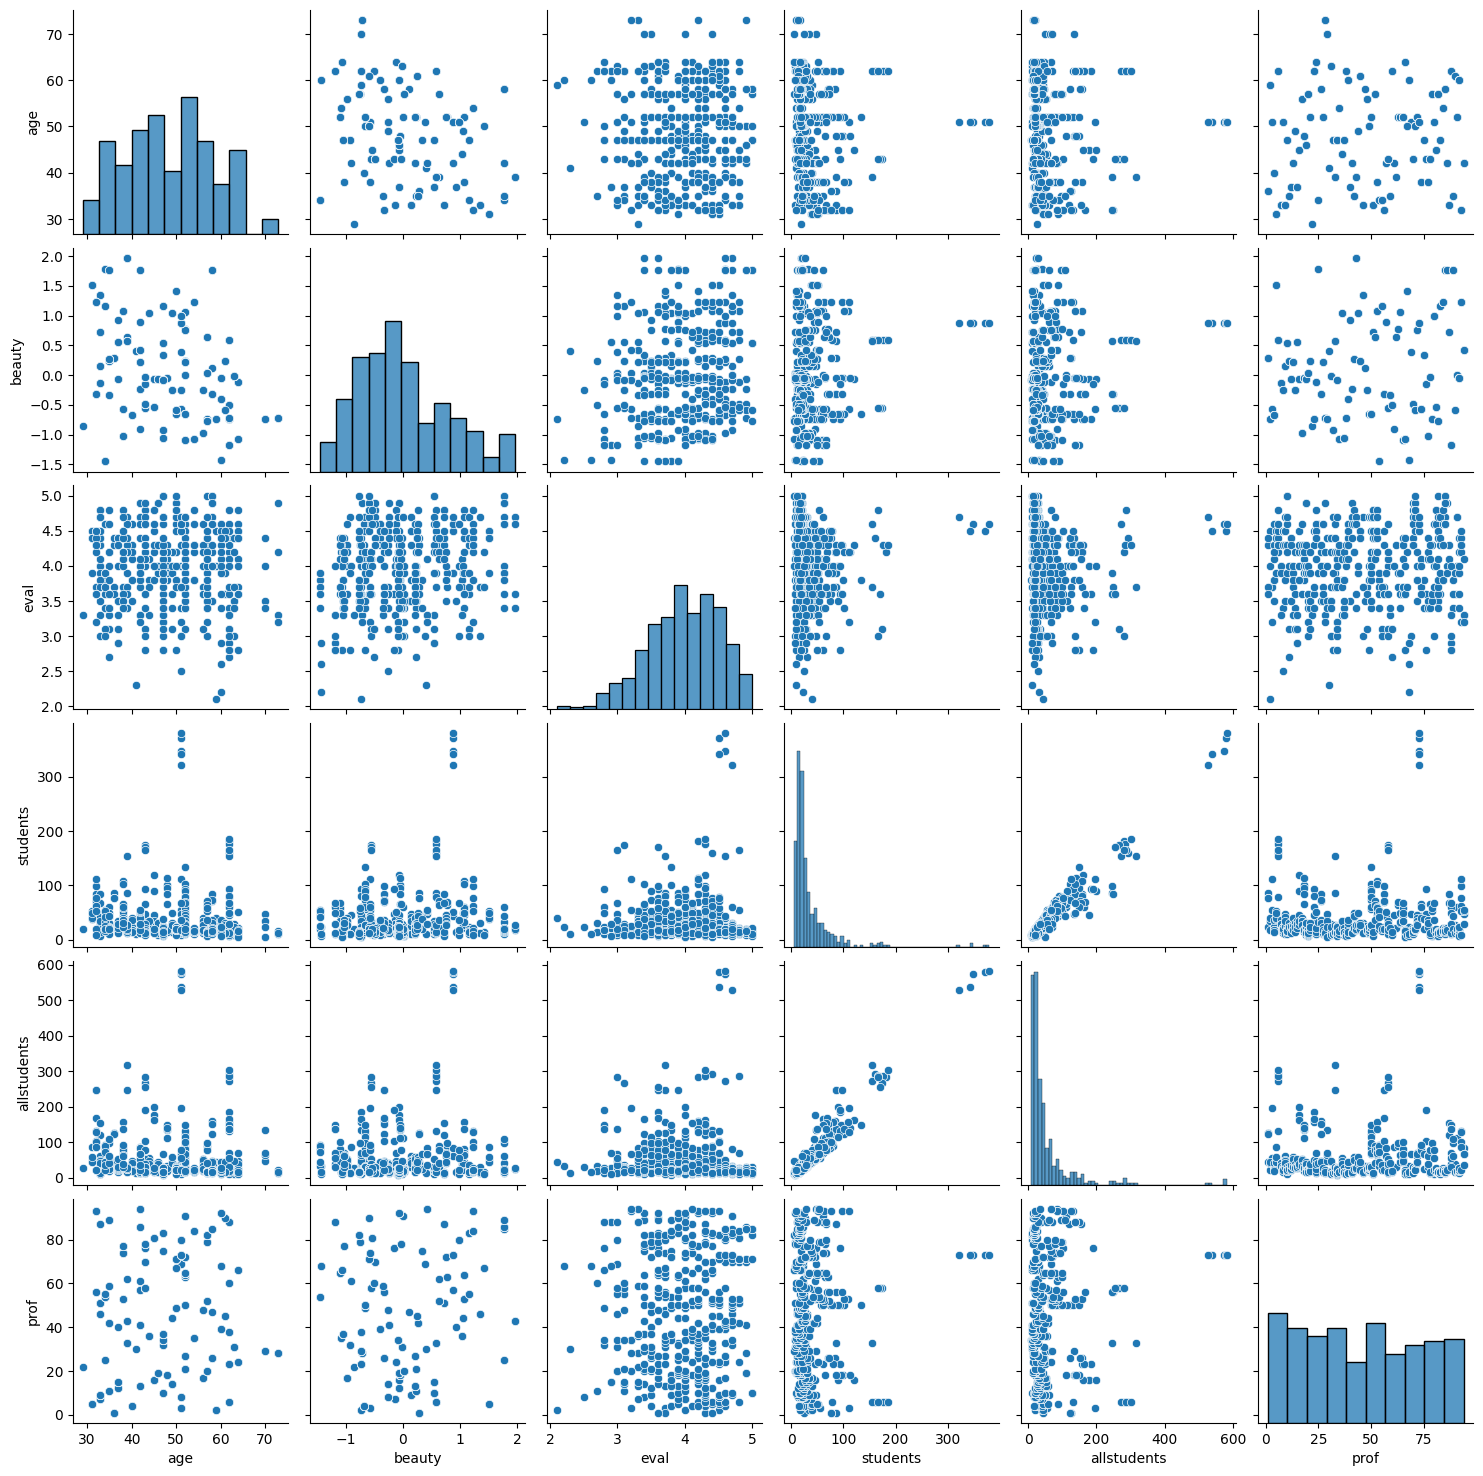

In [9]:
sns.pairplot(beauty.data)

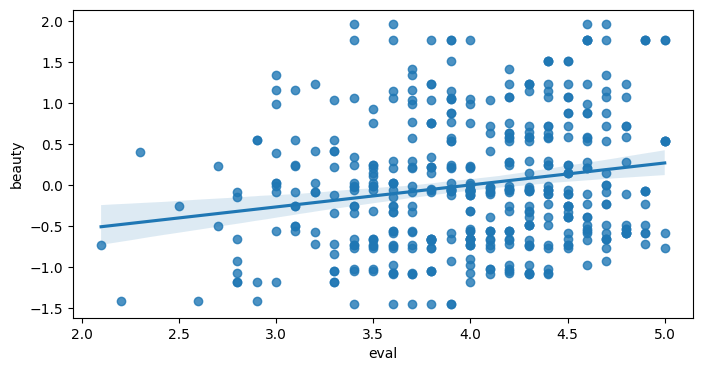

In [10]:
plt.figure(figsize=(8,4))
sns.regplot(x="eval", y="beauty", data = beauty.data)
plt.show()

##### Analyzing Tip Amounts

In [11]:
tips = sns.load_dataset("tips")
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
y = tips['total_bill']
x1 = tips['tip']

x = sm.add_constant(x1)

res = sm.OLS(y, x).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 10 May 2024   Prob (F-statistic):           6.69e-34
Time:                        12:11:16   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7503      1.006      6.707      0.000       4.768       8.733
tip            4.3477      0.305     14.260      0.000       3.747       4.948
==============================================================================
Omnibus:                       58.831   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.799
Skew:                           1.185   Prob(JB):                     5.87e-27
Kurtosis:                       5.502   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Tips Regression Line

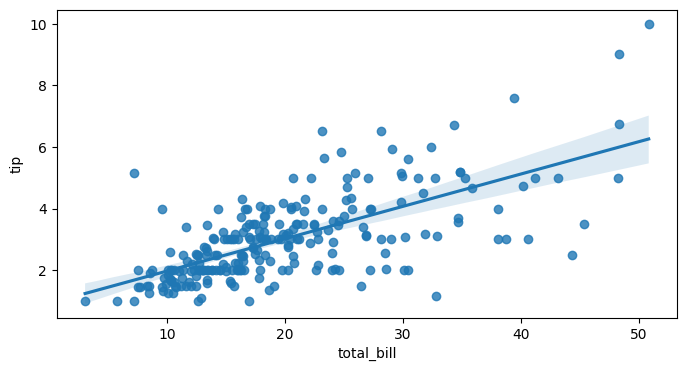

In [13]:
plt.figure(figsize=(8,4))
sns.regplot(x="total_bill", y="tip", data = tips)
plt.show()